In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({'font.size':20})

In [115]:
models_dir = 'cell_collective' # cell_collective OR corrected_models

QC = pd.read_csv('data/model_categories.csv')
QC.columns = ['name', 'category',]

names = []
dss_list = []

with open(f'data/{models_dir}/converged_average_node_values.csv', 'r') as f:
    for row in f:
        entries = row.split(',')
        name = entries.pop(0)
        convergence_measure = entries.pop(0)
        alt_measure = entries.pop(0)
        scheme = entries.pop(0)
        
        if scheme == 'synchronous':
            names.append(name)
            sync_average_values = [float(value) for value in entries]
            dss = 0
        elif scheme == 'asynchronous':
            async_average_values = [float(value) for value in entries]
            for i, value in enumerate(sync_average_values):
                dss += (sync_average_values[i] - async_average_values[i])**2
            dss_list.append(dss)

print(names)
print(dss_list)

N = []
NS = []
for name in names:
    with open(f'models/{models_dir}/{name}.txt', 'r') as f:
        nt = 0
        ns = 0
        for row in f:
            if row[0] == '#':
                continue
            nt += 1
            if row.split(',')[0].strip() == row.split(',')[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

NDF = pd.DataFrame({
    'name': names,
    'N': N,
    'NS': NS,
    'dss': dss_list,
})

QC=QC.merge(NDF)
QC['dss/N'] = (QC['dss'])/(QC['N'])
QC['NS/N'] = (QC['NS'])/(QC['N'])


QC.sort_values(by=['dss/N'], ascending=False)

['Apoptosis Network', 'Arabidopsis thaliana Cell Cycle', 'Aurora Kinase A in Neuroblastoma', 'B bronchiseptica and T retortaeformis coinfection', 'B cell differentiation', 'BT474 Breast Cell Line Long-term ErbB Network', 'BT474 Breast Cell Line Short-term ErbB Network', 'Bordetella bronchiseptica', 'Bortezomib Responses in U266 Human Myeloma Cells', 'Budding Yeast Cell Cycle', 'Budding Yeast Cell Cycle 2009', 'CD4 T cell signaling', 'CD4+ T Cell Differentiation and Plasticity', 'CD4+ T cell Differentiation', 'Cardiac development', 'Cell Cycle Transcription by Coupled CDK and Network Oscillators', 'Cholesterol Regulatory Pathway', 'Colitis-associated colon cancer', 'Cortical Area Development', 'Death Receptor Signaling', 'Differentiation of T lymphocytes', 'EGFR & ErbB Signaling', 'FA BRCA pathway', 'FGF pathway of Drosophila Signalling Pathways', 'Fanconi anemia and checkpoint recovery', 'Glucose Repression Signaling 2009', 'Guard Cell Abscisic Acid Signaling', 'HCC1954 Breast Cell Lin

,name,category,N,NS,dss,dss/N,NS/N
17,Colitis-associated colon cancer,Cancer,70,1,2.398109,3.425870e-02,0.014286
2,Aurora Kinase A in Neuroblastoma,Cancer,23,4,0.635400,2.762609e-02,0.173913
26,Guard Cell Abscisic Acid Signaling,Signal Transduction (Stress/Damage and Homeost...,44,4,0.843036,1.915991e-02,0.090909
18,Cortical Area Development,Development and Differentiation,5,0,0.081920,1.638400e-02,0.000000
70,Tumour Cell Invasion and Migration,Cancer,32,2,0.449222,1.403819e-02,0.062500
37,Iron acquisition and oxidative stress response...,Metabolism,22,2,0.260583,1.184468e-02,0.090909
39,Lymphoid and myeloid cell specification and tr...,Development and Differentiation,33,2,0.367275,1.112955e-02,0.060606
0,Apoptosis Network,Signal Transduction (Stress/Damage and Homeost...,41,2,0.407815,9.946707e-03,0.048780
1,Arabidopsis thaliana Cell Cycle,Cell Cycle,14,0,0.088447,6.317643e-03,0.000000
19,Death Receptor Signaling,Signal Transduction (Stress/Damage and Homeost...,28,3,0.168090,6.003214e-03,0.107143


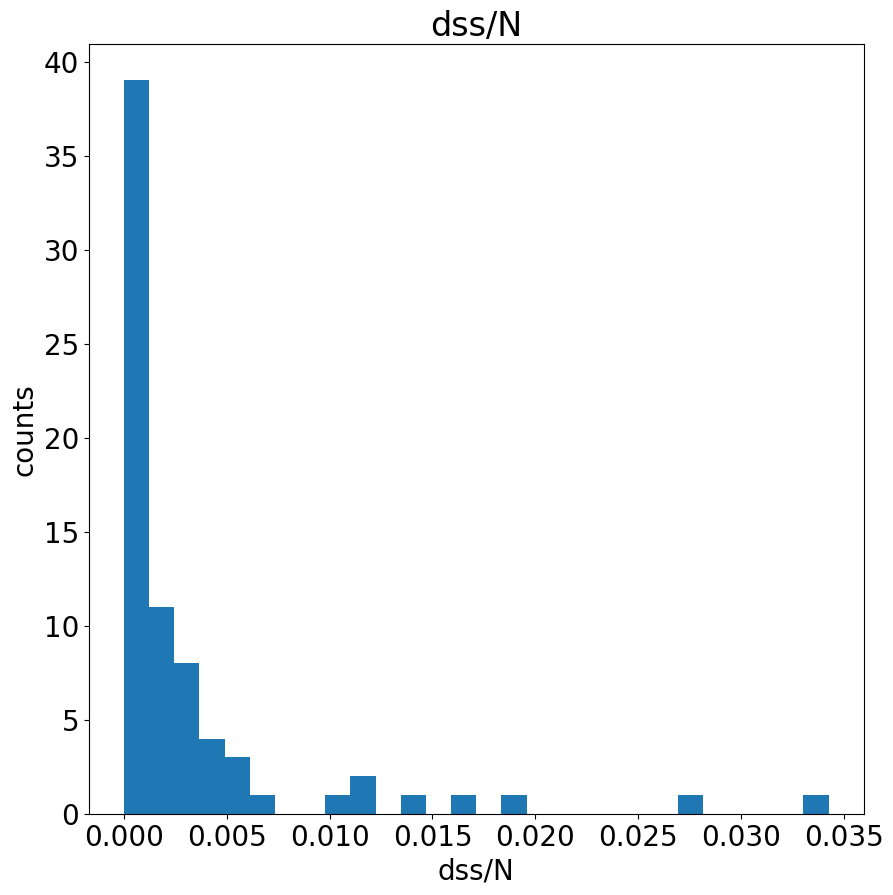

In [116]:
fig, ax = plt.subplots(figsize=(10,10))
# fig.set_facecolor('white')
plt.hist(QC['dss/N'], bins='auto')
ax.set_title('dss/N')
ax.set_xlabel('dss/N')
ax.set_ylabel('counts')

plt.savefig(f'./data/{models_dir}/figures/dss_average.png')
plt.savefig(f'./data/{models_dir}/figures/dss_average.pdf')
plt.show()


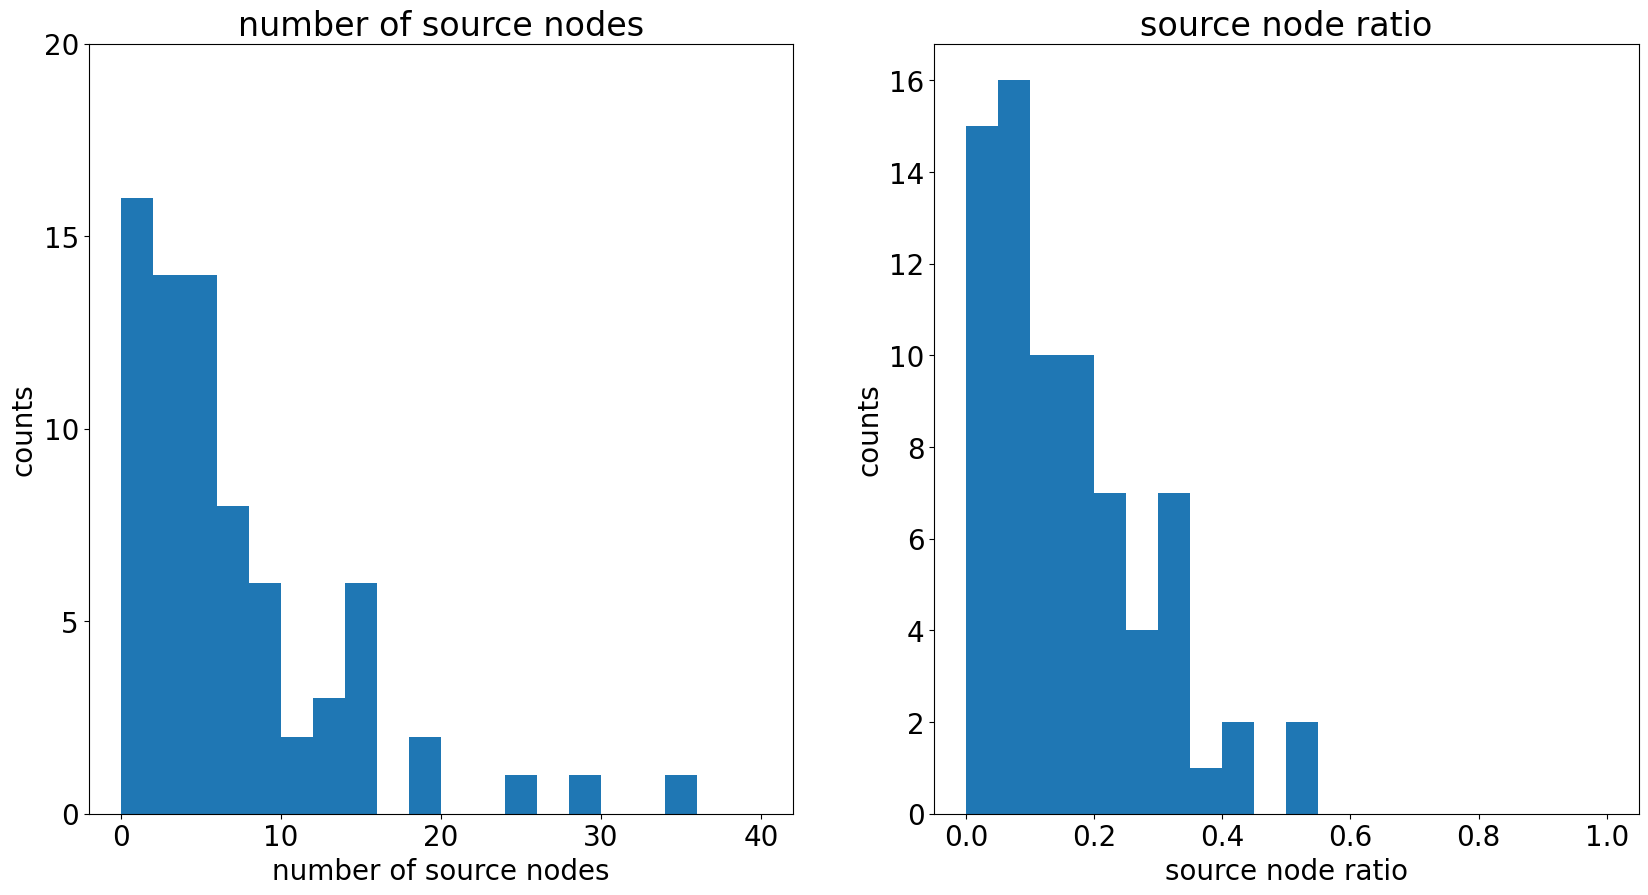

In [117]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(QC['NS'], bins=20, range=(0,40))
ax[0].set_title('number of source nodes')
ax[0].set_xlabel('number of source nodes')
ax[0].set_ylabel('counts')
ax[0].set_ylim(0,20)
ax[0].set_yticks(range(0,25,5))

ax[1].hist(QC['NS/N'], bins=20, range=(0,1))
ax[1].set_title('source node ratio')
ax[1].set_xlabel('source node ratio')
ax[1].set_ylabel('counts')

plt.savefig(f'./data/{models_dir}/figures/sources.png')
plt.savefig(f'./data/{models_dir}/figures/sources.pdf')
plt.show()

#### Other possibilities

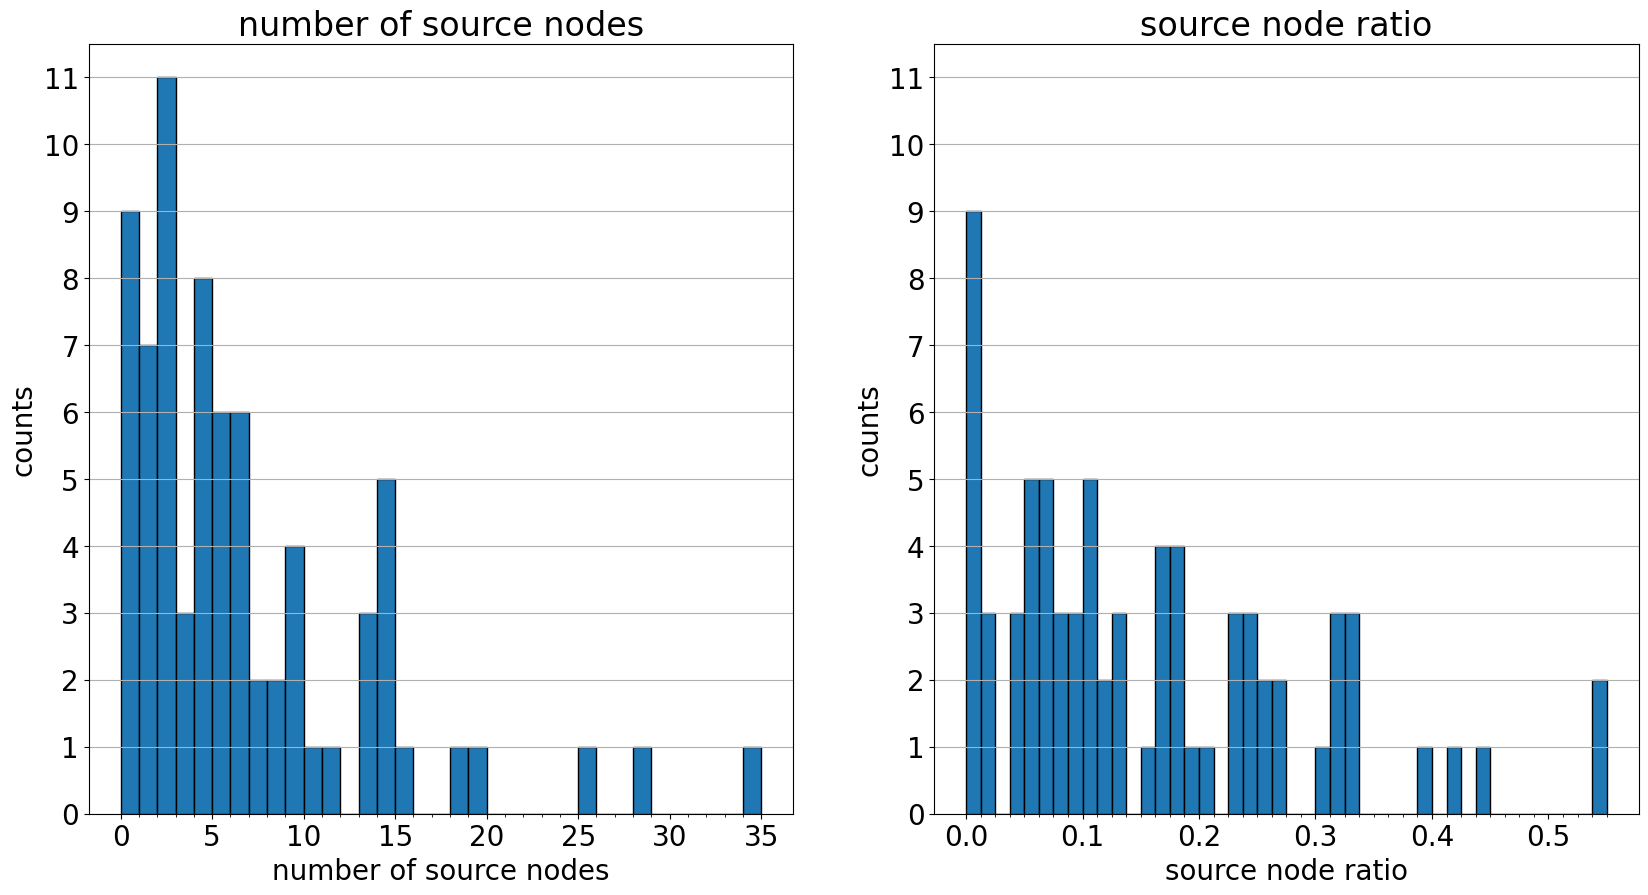

In [142]:

fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(QC['NS'], bins=35, range=(0,35), edgecolor='k')
ax[0].set_title('number of source nodes')
ax[0].set_xlabel('number of source nodes')
ax[0].set_ylabel('counts')
ax[0].set_yticks(range(0,12))
#ax[0].set_yticks(range(0,12), minor=True)
ax[0].set_xticks(range(0,35), minor=True)
ax[0].set_ylim((0, 11.5))
ax[0].grid(axis='y')


ax[1].hist(QC['NS/N'], bins=[i*0.0125 for i in range(45)], edgecolor='k')
ax[1].set_title('source node ratio')
ax[1].set_xlabel('source node ratio')
ax[1].set_ylabel('counts')
ax[1].set_yticks(range(0,12))
#ax[1].set_xticks([0.00, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56])
ax[1].set_xticks([i*0.0125 for i in range(45)], minor=True)
ax[1].set_ylim((0, 11.5))
ax[1].grid(axis='y')


plt.savefig(f'./data/{models_dir}/figures/number_sources.png')
plt.savefig(f'./data/{models_dir}/figures/number_sources.pdf')
plt.show()

In [156]:
from scipy.stats import gaussian_kde
def comparison_plots(vars, hlines=None, vlines=None, quads=None):
    #icount = len(vars)
    #jcount = len(vars[0])

    #fig = plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    fig.set_facecolor('white')
    
    dx = gaussian_kde(QC[vars])
    lx = np.linspace(min(QC[vars]),max(QC[vars]),1000)
    dlx = dx(lx)
    ax.fill_between(lx,dlx,color='lightgrey')
    ax.vlines(np.quantile(QC[vars],[0.0,0.25,0.5,0.75,1.0]),0,np.array([0.25,0.5,1.0,0.5,0.25])*max(dlx)/2,linewidth=5,color='red')

    return fig


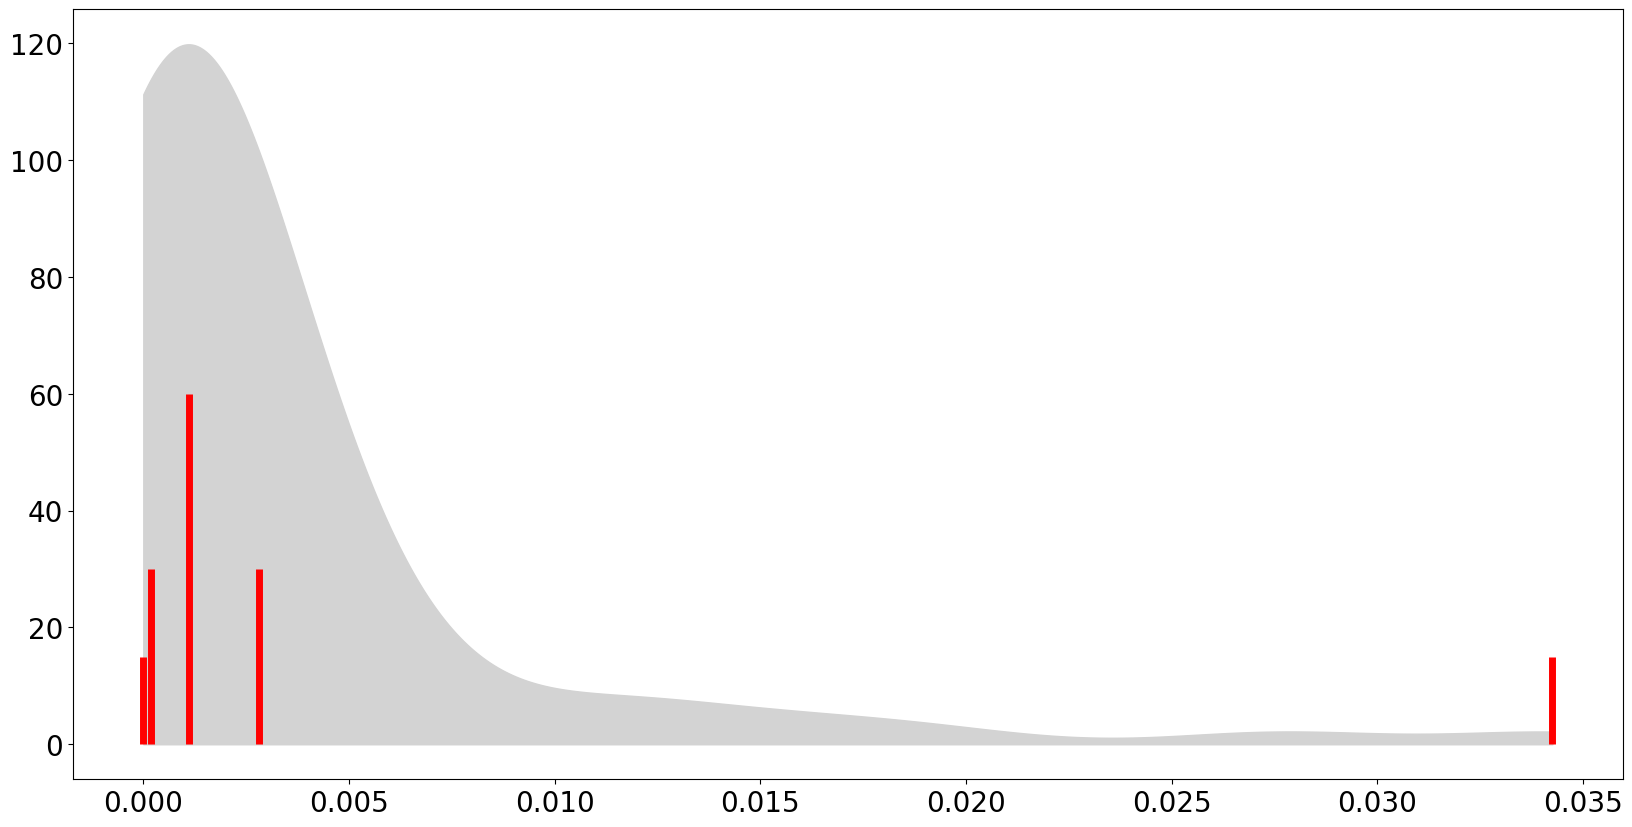

In [158]:
fig = comparison_plots('dss/N')
plt.show()